In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("Financial econometrics/BTC-USD.csv")
dataE=pd.read_csv("Financial econometrics/ETH-USD.csv")

In [2]:
data=data.set_index(['Date'])
dataE=dataE.set_index(['Date'])
data=data.dropna()
dataE=dataE.dropna()

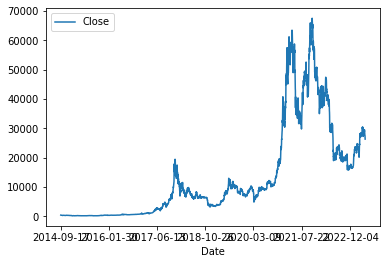

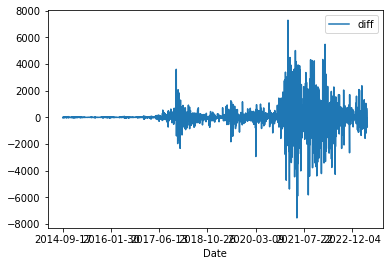

In [3]:
# Stationary test (visible)
data['Close'].plot()
plt.legend()
plt.show()
data['diff']=data['Close'].diff(1)
data['diff'].plot()
plt.legend()
plt.show()

In [4]:
# ADF(unit root)
from statsmodels.tsa.stattools import adfuller
data=data.dropna()
result=adfuller(data['Close'],autolag='AIC')
print(f'ADF statistic: {result[0]}')
print(f'n_lags:{result[1]}')
print(f'p-value:{result[1]}')
for key, value in result[4].items():
    print('Critical Value')
    print(f' {key},{value}')
result=adfuller(data['diff'],autolag='AIC')
print(f'diff1 ADF statistic: {result[0]}')
print(f'n_lags:{result[1]}')
print(f'p-value:{result[1]}')
for key, value in result[4].items():
    print('Critical Value')
    print(f' {key},{value}')

ADF statistic: -1.6067623833679545
n_lags:0.4801957079396917
p-value:0.4801957079396917
Critical Value
 1%,-3.4324416180141895
Critical Value
 5%,-2.862464147407348
Critical Value
 10%,-2.5672619455835424
diff1 ADF statistic: -9.351300502995114
n_lags:8.281798227885323e-16
p-value:8.281798227885323e-16
Critical Value
 1%,-3.43244094921638
Critical Value
 5%,-2.8624638520136303
Critical Value
 10%,-2.5672617883207955


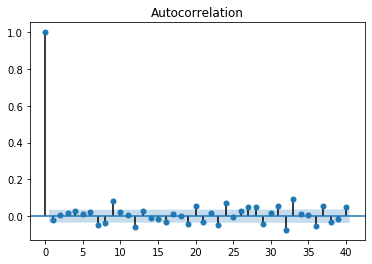

In [5]:
#ACF
import statsmodels.tsa.stattools as st
def default_acf(ts,k):
    return st.acf(ts,nlags=k,unbiased=True)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['diff'],lags=40)
plt.show()

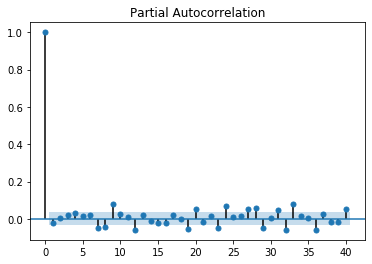

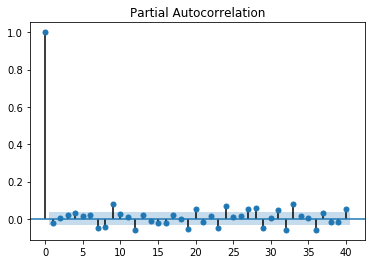

In [6]:
def default_pacf(ts,k):
    return st.pacf(ts,nlags=k,unbiased=True)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['diff'],lags=40,method='ols')
plot_pacf(data['diff'],lags=40,method='yw')
plt.show()

In [7]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF

In [8]:
def decomposing(data):
    decomposition = seasonal_decompose(data, period=30)
    trend = decomposition.trend
    residual = decomposition.resid
    
    #index = pd.date_range(start=data.index[0], periods=len(data), freq=data.index.freq)
    #trend.index = index
    #seasonal.index = index
    #residual.index = index

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(data, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()


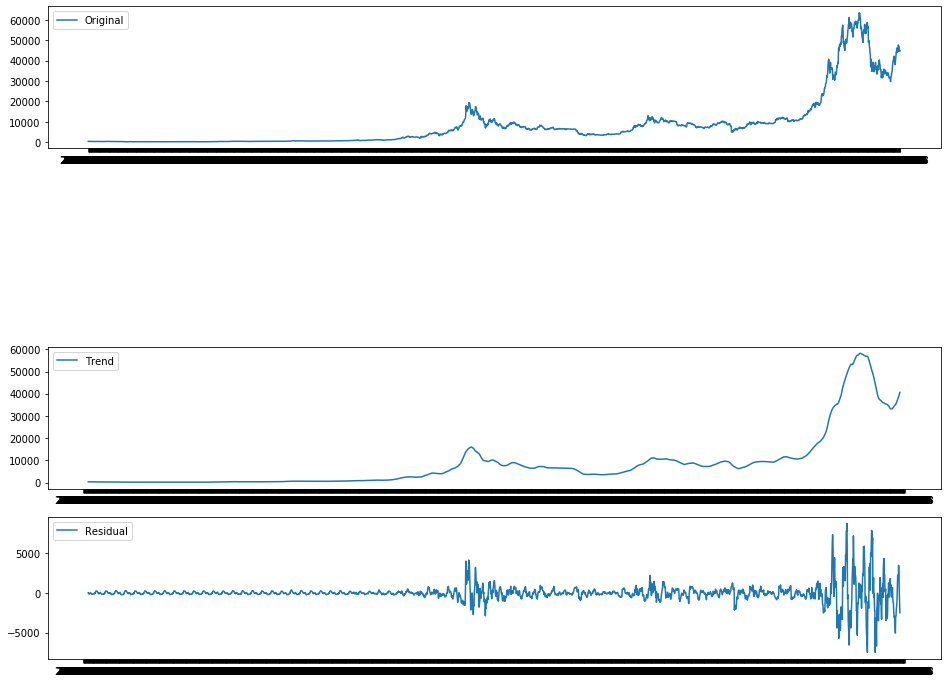

In [9]:
t = .8
t = int(t*len(data))
data_train = data[:t]['Close']
data_test = data[t:]

decomposing(data_train)


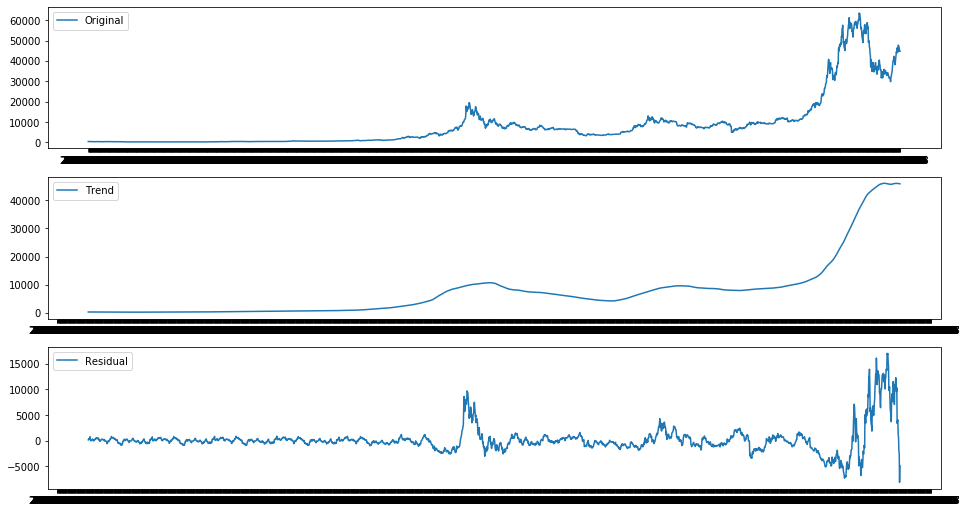

In [10]:
def decomposing(data):
    decomposition = seasonal_decompose(data, period=180)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    #index = pd.date_range(start=data.index[0], periods=len(data), freq=data.index.freq)
    #trend.index = index
    #seasonal.index = index
    #residual.index = index

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(data, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()

t = .8
t = int(t*len(data))
data_train = data[:t]['Close']
data_test = data[t:]['Close']

decomposing(data_train)

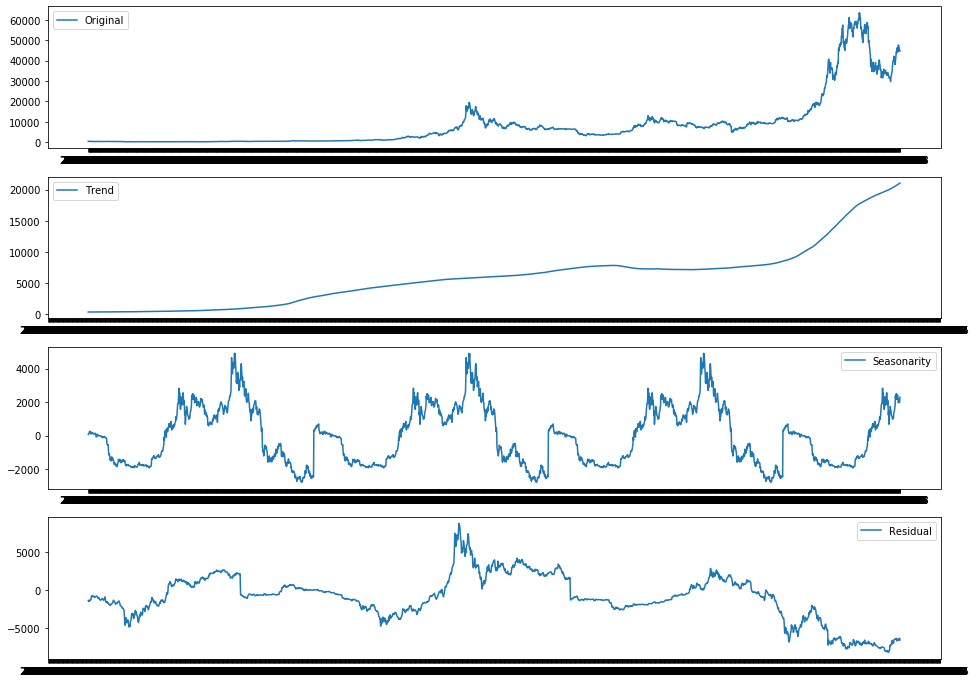

In [11]:
def decomposing(data):
    decomposition = seasonal_decompose(data, period=730)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    #index = pd.date_range(start=data.index[0], periods=len(data), freq=data.index.freq)
    #trend.index = index
    #seasonal.index = index
    #residual.index = index

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(data, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonarity')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()

t = .8
t = int(t*len(data))
data_train = data[:t]['Close']
data_test = data[t:]

decomposing(data_train)

In [12]:
decomposition = seasonal_decompose(data_train,period=30)
trend = decomposition.trend.dropna()
trenddiff=trend.diff(1).dropna()
residual = decomposition.resid.dropna()


result_trend=adfuller(trend,autolag='AIC')
print(f'trend ADF statistic: {result_trend[0]}')
print(f'n_lags:{result_trend[1]}')
print(f'p-value:{result_trend[1]}')
for key, value in result_trend[4].items():
    print('Critical Value')
    print(f' {key},{value}')
    
result_trenddiff=adfuller(trenddiff,autolag='AIC')
print(f'trenddiff ADF statistic: {result_trenddiff[0]}')
print(f'n_lags:{result_trenddiff[1]}')
print(f'p-value:{result_trenddiff[1]}')
for key, value in result_trenddiff[4].items():
    print('Critical Value')
    print(f' {key},{value}')
    
result_res=adfuller(residual,autolag='AIC')
print(f'residual ADF statistic: {result_res[0]}')
print(f'n_lags:{result_res[1]}')
print(f'p-value:{result_res[1]}')
for key, value in result_res[4].items():
    print('Critical Value')
    print(f' {key},{value}')

trend ADF statistic: -0.05892659531696116
n_lags:0.9533790192897645
p-value:0.9533790192897645
Critical Value
 1%,-3.4330002465470844
Critical Value
 5%,-2.862710858596359
Critical Value
 10%,-2.567393294431969
trenddiff ADF statistic: -6.0985191942754895
n_lags:9.96508841982693e-08
p-value:9.96508841982693e-08
Critical Value
 1%,-3.433002396474742
Critical Value
 5%,-2.862711807995448
Critical Value
 10%,-2.5673937999062226
residual ADF statistic: -13.212587956274298
n_lags:1.0397825706382354e-24
p-value:1.0397825706382354e-24
Critical Value
 1%,-3.432999172889712
Critical Value
 5%,-2.862710384473485
Critical Value
 10%,-2.5673930420019127


In [13]:
decomposition1 = seasonal_decompose(data_train, period=180)
trend1 = decomposition1.trend.dropna()
residual1 = decomposition1.resid.dropna()



result_trend1=adfuller(trend1,autolag='AIC')
print(f'trend ADF statistic: {result_trend1[0]}')
print(f'n_lags:{result_trend1[1]}')
print(f'p-value:{result_trend1[1]}')
for key, value in result_trend1[4].items():
    print('Critical Value')
    print(f' {key},{value}')
    
result_res1=adfuller(residual1,autolag='AIC')
print(f'residual ADF statistic: {result_res1[0]}')
print(f'n_lags:{result_res1[1]}')
print(f'p-value:{result_res1[1]}')
for key, value in result_res1[4].items():
    print('Critical Value')
    print(f' {key},{value}')

trend ADF statistic: -3.3787998995542994
n_lags:0.011703164842459457
p-value:0.011703164842459457
Critical Value
 1%,-3.4331717888373885
Critical Value
 5%,-2.86278660880994
Critical Value
 10%,-2.567433625334423
residual ADF statistic: -4.781144279733402
n_lags:5.908760590906524e-05
p-value:5.908760590906524e-05
Critical Value
 1%,-3.433173007001078
Critical Value
 5%,-2.8627871467151595
Critical Value
 10%,-2.56743391172832


In [14]:
decomposition2 = seasonal_decompose(data_train, period=730)
trend2 = decomposition2.trend.dropna()
trenddiff_2=trend2.diff(1).dropna()
trenddiff_22=trenddiff_2.diff(1).dropna()
residual2 = decomposition2.resid.dropna()
residualdiff2 = decomposition2.resid.diff(1).dropna()

result_trend2=adfuller(trend2,autolag='AIC')
print(f'trend ADF statistic: {result_trend2[0]}')
print(f'n_lags:{result_trend2[1]}')
print(f'p-value:{result_trend2[1]}')
for key, value in result_trend2[4].items():
    print('Critical Value')
    print(f' {key},{value}')
    
result_trenddiff_2=adfuller(trenddiff_2,autolag='AIC')
print(f'trenddiff ADF statistic: {result_trenddiff_2[0]}')
print(f'n_lags:{result_trenddiff_2[1]}')
print(f'p-value:{result_trenddiff_2[1]}')
for key, value in result_trenddiff_2[4].items():
    print('Critical Value')
    print(f' {key},{value}')
    
result_trenddiff_22=adfuller(trenddiff_22,autolag='AIC')
print(f'trenddiff2 ADF statistic: {result_trenddiff_22[0]}')
print(f'n_lags:{result_trenddiff_22[1]}')
print(f'p-value:{result_trenddiff_22[1]}')
for key, value in result_trenddiff_22[4].items():
    print('Critical Value')
    print(f' {key},{value}')
    
result_res2=adfuller(residual2,autolag='AIC')
print(f'residual ADF statistic: {result_res2[0]}')
print(f'n_lags:{result_res2[1]}')
print(f'p-value:{result_res2[1]}')
for key, value in result_res2[4].items():
    print('Critical Value')
    print(f' {key},{value}')

result_resdiff2=adfuller(residualdiff2,autolag='AIC')
print(f'residual ADF statistic: {result_resdiff2[0]}')
print(f'n_lags:{result_resdiff2[1]}')
print(f'p-value:{result_resdiff2[1]}')
for key, value in result_resdiff2[4].items():
    print('Critical Value')
    print(f' {key},{value}')

trend ADF statistic: 0.5464312667194897
n_lags:0.9862180652398048
p-value:0.9862180652398048
Critical Value
 1%,-3.4340457100503534
Critical Value
 5%,-2.8631724504188356
Critical Value
 10%,-2.5676390661481077
trenddiff ADF statistic: -1.1889232665984732
n_lags:0.6783424004831959
p-value:0.6783424004831959
Critical Value
 1%,-3.434049892073606
Critical Value
 5%,-2.863174296537224
Critical Value
 10%,-2.5676400491557345
trenddiff2 ADF statistic: -7.097667799574042
n_lags:4.2476414227117753e-10
p-value:4.2476414227117753e-10
Critical Value
 1%,-3.434049892073606
Critical Value
 5%,-2.863174296537224
Critical Value
 10%,-2.5676400491557345
residual ADF statistic: -1.9827061315128225
n_lags:0.29420695503528027
p-value:0.29420695503528027
Critical Value
 1%,-3.4340373743018104
Critical Value
 5%,-2.8631687706662676
Critical Value
 10%,-2.567637106781613
residual ADF statistic: -8.052707241675245
n_lags:1.7248718030303404e-12
p-value:1.7248718030303404e-12
Critical Value
 1%,-3.43403737430

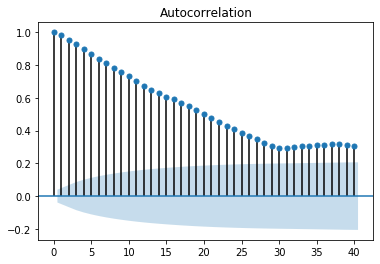

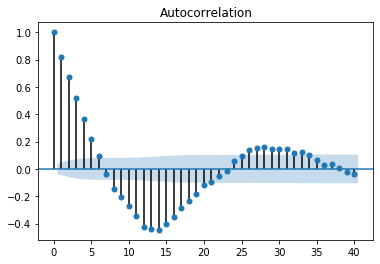

In [15]:
# period=30
def default_acf(ts,k):
    return st.acf(ts,nlags=k,unbiased=True)
plot_acf(trenddiff,lags=40)
plot_acf(residual,lags=40)
plt.show()

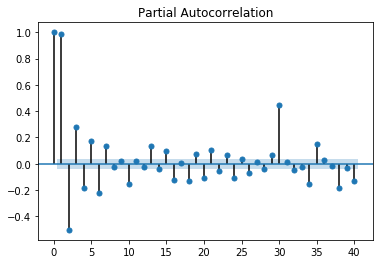

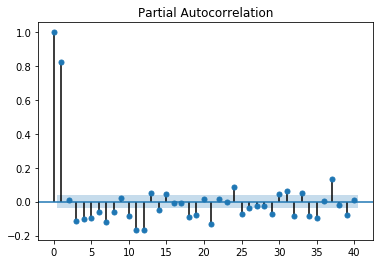

In [16]:
def default_pacf(ts,k):
    return st.pacf(ts,nlags=k,unbiased=True)
plot_pacf(trenddiff,lags=40,method='ols')
plot_pacf(residual,lags=40,method='ols')
plt.show()

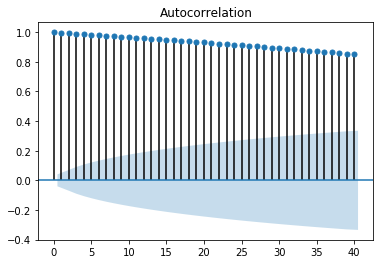

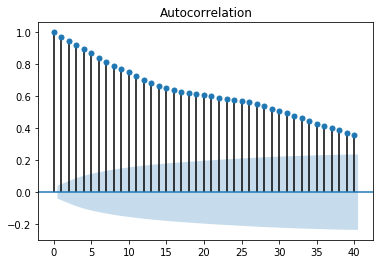

In [17]:
#period=180
def default_acf(ts,k):
    return st.acf(ts,nlags=k,unbiased=True)
plot_acf(trend1,lags=40)
plot_acf(residual1,lags=40)
plt.show()

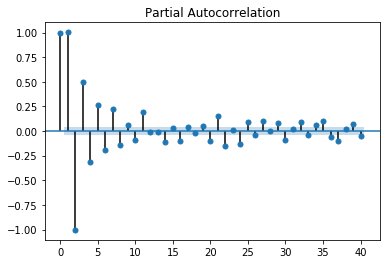

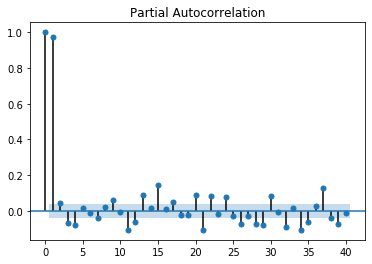

In [18]:
def default_pacf(ts,k):
    return st.pacf(ts,nlags=k,unbiased=True)
plot_pacf(trend1,lags=40,method='ols')
plot_pacf(residual1,lags=40,method='ols')
plt.show()

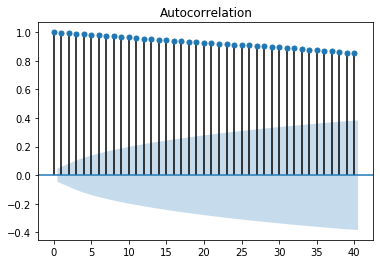

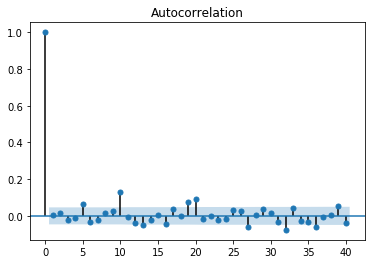

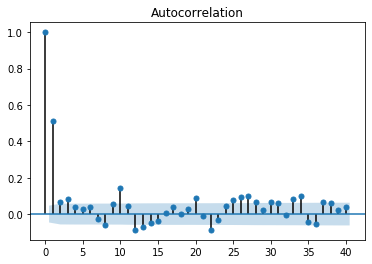

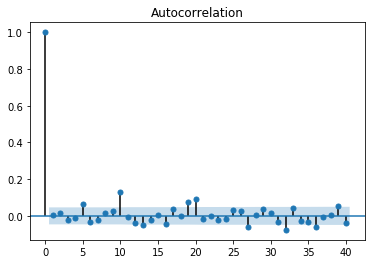

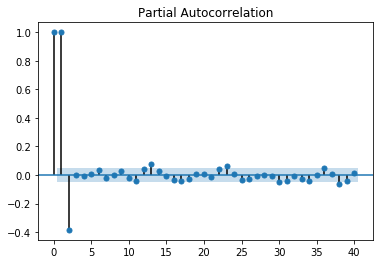

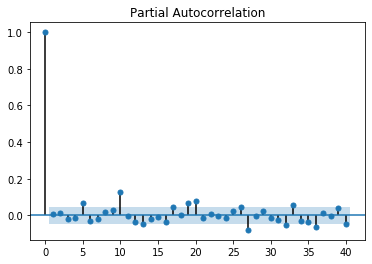

In [23]:
decomposition = seasonal_decompose(data_train, period=730)
trend = decomposition.trend.dropna()
trenddiff2=trend.diff(2).dropna()
seasonal = decomposition.seasonal.dropna()
residualdiff = decomposition.resid.diff(1).dropna()
    
def default_acf(ts,k):
    return st.acf(ts,nlags=k,unbiased=True)
plot_acf(trenddiff2,lags=40)
plot_acf(residualdiff,lags=40)
plot_acf(trenddiff_22,lags=40)
plot_acf(residualdiff2,lags=40)
plt.show()

def default_pacf(ts,k):
    return st.pacf(ts,nlags=k,unbiased=True)
plot_pacf(trenddiff2,lags=40,method='yw')
plot_pacf(residualdiff,lags=40,method='yw')
plt.show()

In [92]:
# trenddiff2 AR(2)
def ARIMA_Model(data, order):
    model = ARIMA(data, order=order)
    return model.fit(disp=0)

#data_train_series = pd.Series(data_train, freq='D') 

decomposition = seasonal_decompose(data['Close'], period=730)
trend = decomposition.trend.dropna(0)
seasonal=decomposition.seasonal.dropna(0)
residual = decomposition.resid.dropna(0)

trend

Date
2015-09-18      369.617376
2015-09-19      369.889035
2015-09-20      370.173557
2015-09-21      370.454251
2015-09-22      370.731298
                  ...     
2022-05-08    33596.938383
2022-05-09    33554.689722
2022-05-10    33514.407817
2022-05-11    33474.721634
2022-05-12    33438.763836
Name: trend, Length: 2429, dtype: float64

C:\Users\xxhec\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\xxhec\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\xxhec\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\xxhec\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


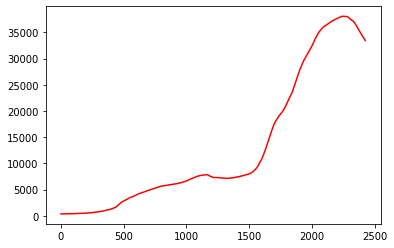

In [93]:
Tr=trend.values
history=[tr for tr in Tr]
prediction=list()

for t in range(len(Tr)):
    model=ARIMA(history, order=(1,2,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    prediction.append(yhat)
    obs=Tr[t]
    history.append(obs)

prediction=np.concatenate(prediction).reshape(-1)
#Tr=Tr.reshape(-1,1)

plt.plot(prediction[3:],color='red')
plt.show()
prediction[:3] = 0

In [94]:
Pred= pd.DataFrame({'prediction': prediction})
Pred=Pred.set_index(trend.index)
Pred=Pred.iloc[:, 0]

In [95]:
fit_seq=seasonal
fit_seq = fit_seq.add(Pred,fill_value=0)
#fit_seq = fit_seq.add(trend1)
#fit_seq = fit_seq.add(residual_fit_seq, fill_value=0)

In [100]:
fit_seq

Date
2014-09-18   -5097.525122
2014-09-19   -5096.428665
2014-09-20   -5110.740851
2014-09-21   -5042.456797
2014-09-22   -5046.909975
                 ...     
2023-05-08    6203.184679
2023-05-09    6076.909354
2023-05-10    5568.063283
2023-05-11    5717.263640
2023-05-12    3493.957934
Length: 3159, dtype: float64

In [99]:
data_test = data[t:]['Close']

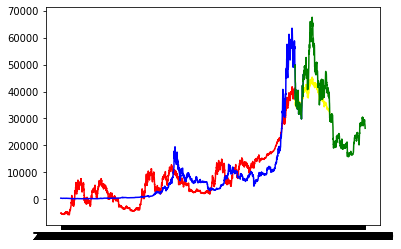

In [103]:
plt.plot(fit_seq.loc[:'2021-05-12'], color='red', label='fit_seq_train')
plt.plot(fit_seq.loc['2021-05-12':'2022-05-12'], color='yellow', label='fit_seq_test')
plt.plot(data_train, color='blue', label='data_train')
plt.plot(data_test, color='green', label='data_test')
#plt.legend(loc='best')
plt.show()

In [117]:
Res=residual.values
historyr=[res for res in Res]
predictionr=list()

for t in range(len(Res)):
    modelr=ARIMA(historyr, order=(1,2,0))
    model_fitr=modelr.fit()
    outputr=model_fitr.forecast()
    rhat=outputr[0]
    predictionr.append(rhat)


predictionr=np.concatenate(predictionr).reshape(-1)

Predr= pd.DataFrame({'predictionr': predictionr})
Predr=Predr.set_index(trend.index)
Predr=Predr.iloc[:, 0]

In [121]:
Predr= pd.DataFrame({'predictionr': predictionr})
Predr=Predr.set_index(trend.index)
Predr=Predr.iloc[:, 0]
Predr

Date
2015-09-18       0.000000
2015-09-19       0.000000
2015-09-20       0.000000
2015-09-21   -1825.520143
2015-09-22   -1825.520143
                 ...     
2022-05-08   -1825.520143
2022-05-09   -1825.520143
2022-05-10   -1825.520143
2022-05-11   -1825.520143
2022-05-12   -1825.520143
Name: predictionr, Length: 2429, dtype: float64

In [126]:
fit_seq=seasonal
fit_seq = fit_seq.add(Pred,fill_value=0)
fit_seq = fit_seq.add(Predr,fill_value=0)
fit_seq

Date
2014-09-18   -5097.525122
2014-09-19   -5096.428665
2014-09-20   -5110.740851
2014-09-21   -5042.456797
2014-09-22   -5046.909975
                 ...     
2023-05-08    6203.184679
2023-05-09    6076.909354
2023-05-10    5568.063283
2023-05-11    5717.263640
2023-05-12    3493.957934
Length: 3159, dtype: float64

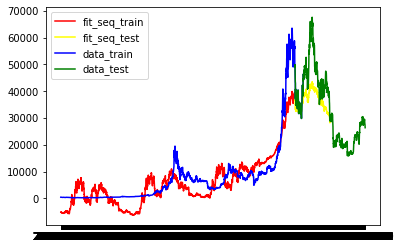

In [130]:
plt.plot(fit_seq.loc[:'2021-05-12'], color='red', label='fit_seq_train')
plt.plot(fit_seq.loc['2021-05-12':'2022-05-12'], color='yellow', label='fit_seq_test')
plt.plot(data_train, color='blue', label='data_train')
plt.plot(data_test, color='green', label='data_test')
plt.legend(loc='best')
plt.show()

In [129]:
R=data['Close']/data['Close'].shift(1)-1
rp=fit_seq/fit_seq.shift(1)-1

In [139]:
rp

Date
2014-09-19   -0.000215
2014-09-20    0.002808
2014-09-21   -0.013361
2014-09-22    0.000883
2014-09-23    0.036110
                ...   
2023-05-08    0.095639
2023-05-09   -0.020357
2023-05-10   -0.083734
2023-05-11    0.026796
2023-05-12   -0.388876
Length: 3158, dtype: float64

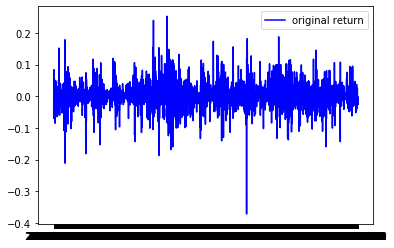

In [138]:
R=R.dropna()
rp=rp.dropna()
#plt.plot(rp, color='red', label='predicted return')
plt.plot(R, color='blue', label='original return')
plt.legend(loc='best')
plt.show()